# ART for Tensorflow v2 - Keras API

This notebook demonstrate applying ART with the new Tensorflow v2 using the Keras API. The code follows and extends the examples on www.tensorflow.org.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt
from art.classifiers import KerasClassifier
from art.attacks import FastGradientMethod, CarliniLInfMethod

In [2]:
if tf.__version__[0] != '2':
    raise ImportError('This notebook requires Tensorflow v2.')

# Load MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_test = x_test[0:100]
y_test = y_test[0:100]

# Tensorflow with Keras API

Create a model using Keras API. Here we use the Keras Sequential model and add a sequence of layers. Afterwards the model is compiles with optimizer, loss function and metrics.

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit the model on training data.

In [5]:
model.fit(x_train, y_train, epochs=3);

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3038 - accuracy: 0.9122
Epoch 2/3
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1460 - accuracy: 0.9568
Epoch 3/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1107 - accuracy: 0.9664


Evaluate model accuracy on test data.

In [6]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

100/100 [==============================] - 0s 1ms/sample - loss: 0.0308 - accuracy: 1.0000
Accuracy on test data: 100.00%


Create a ART Keras classifier for the Tensorflow Keras model.

In [7]:
classifier = KerasClassifier(model=model, clip_values=(0, 1))

## Fast Gradient Sign Method attack

Create a ART Fast Gradient Sign Method attack.

In [8]:
attack_fgsm = FastGradientMethod(classifier=classifier, eps=0.3)

Generate adversarial test data.

In [9]:
x_test_adv = attack_fgsm.generate(x_test)

Evaluate accuracy on adversarial test data and calculate average perturbation.

In [10]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

100/100 [==============================] - 0s 302us/sample - loss: 17.4932 - accuracy: 0.0000e+00
Accuracy on adversarial test data: 0.00%
Average perturbation: 0.18


Visualise the first adversarial test sample.

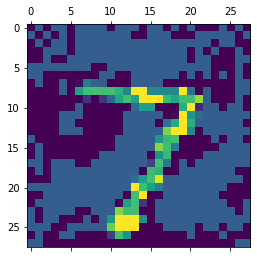

In [11]:
plt.matshow(x_test_adv[0])
plt.show()

## Carlini&Wagner Infinity-norm attack

Create a ART Carlini&Wagner Infinity-norm attack.

In [12]:
attack_cw = CarliniLInfMethod(classifier=classifier, eps=0.3, max_iter=100, learning_rate=0.01)

Generate adversarial test data.

In [13]:
x_test_adv = attack_cw.generate(x_test)

Evaluate accuracy on adversarial test data and calculate average perturbation.

In [14]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

100/100 [==============================] - 0s 156us/sample - loss: 1.4929 - accuracy: 0.2400
Accuracy on adversarial test data: 24.00%
Average perturbation: 0.02


Visualise the first adversarial test sample.

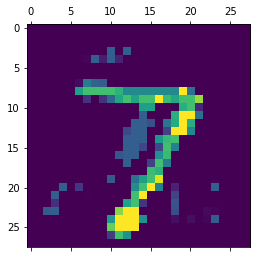

In [15]:
plt.matshow(x_test_adv[0, :, :])
plt.show()